# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [169]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns

## load the data sets

In [170]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [171]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [172]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

<AxesSubplot:xlabel='count', ylabel='country'>

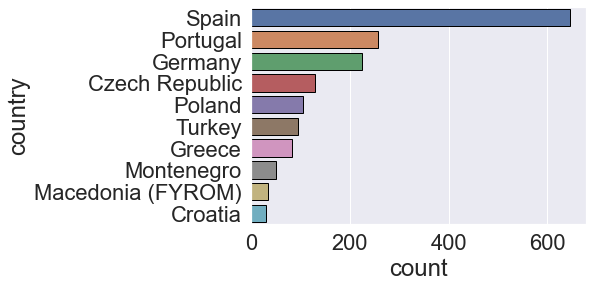

In [173]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

country_counts = df['country'].value_counts()[:10].rename_axis('country').to_frame('count')
sns.barplot(y = country_counts.index, x = 'count', data = country_counts, orient = 'h', edgecolor = 'black')

Now you try: re-create the plot above, but make the bars orange with maroon edges.

<AxesSubplot:xlabel='count', ylabel='city'>

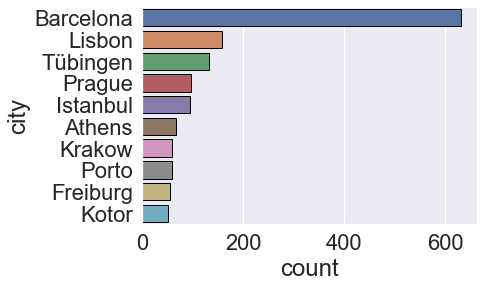

In [174]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
city_counts = df['city'].value_counts()[:10].rename_axis('city').to_frame('count')
sns.barplot(y = city_counts.index, x = 'count', data = city_counts, orient = 'h', edgecolor = 'black')

## Next: scatter plots as simple maps

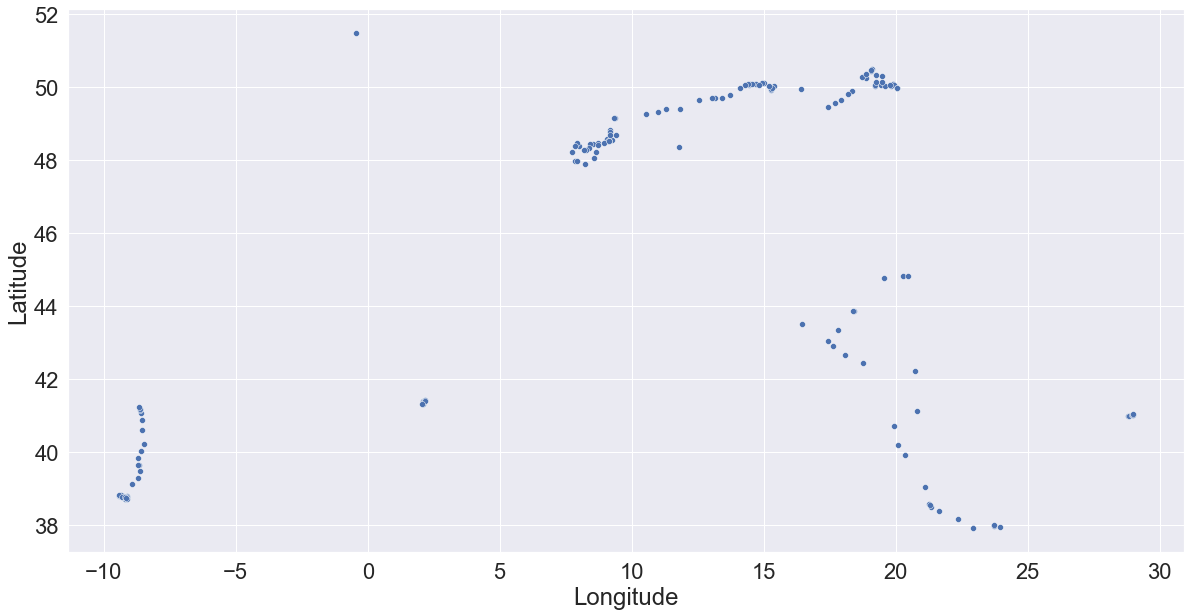

In [175]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

plt.subplots(figsize = (20, 10))
sns.scatterplot(x = 'lon', y = 'lat', data = rs)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Line charts, with annotation

In [176]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

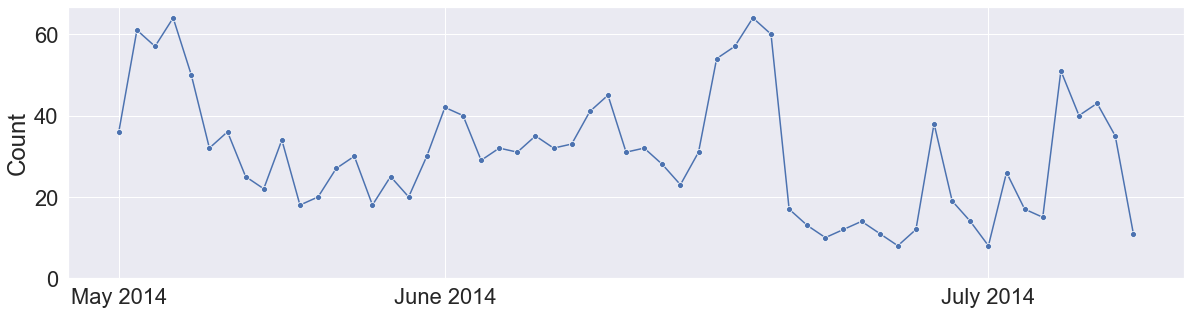

In [177]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings.
sns.set_style('darkgrid')
plt.subplots(figsize = (20, 5))
sns.lineplot(data = countdata, marker='o')
plt.ylabel("Count")
plt.xticks(['2014-05-14', '2014-06-01', '2014-07-01'], ["May 2014", "June 2014", "July 2014"])
plt.ylim(0)
plt.show()

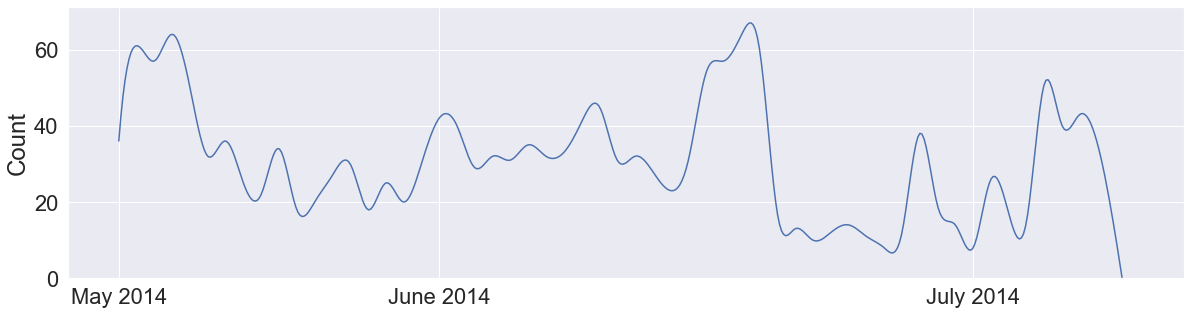

In [178]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(0, len(countdata), 500)


spl = make_interp_spline(x = range(0, len(countdata)), y = countdata.values)
power_smooth = spl(xnew)

sns.set_style('darkgrid')
plt.subplots(figsize = (20, 5))
sns.lineplot(x = xnew, y = power_smooth, data = countdata)
plt.ylabel("Count")
plt.xticks([0, 18, 48], ["May 2014", "June 2014", "July 2014"])
plt.ylim(0)
plt.show()

## Pie charts

In [179]:
cities = df['city'].value_counts()
# print(cities.count())
# cities.head()
remaining = sum(cities.values) - sum(cities.values[:6])
trunc_cities = cities[:6]
trunc_cities['Other'] = remaining
print(trunc_cities)

Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Athens        67
Other        580
Name: city, dtype: int64


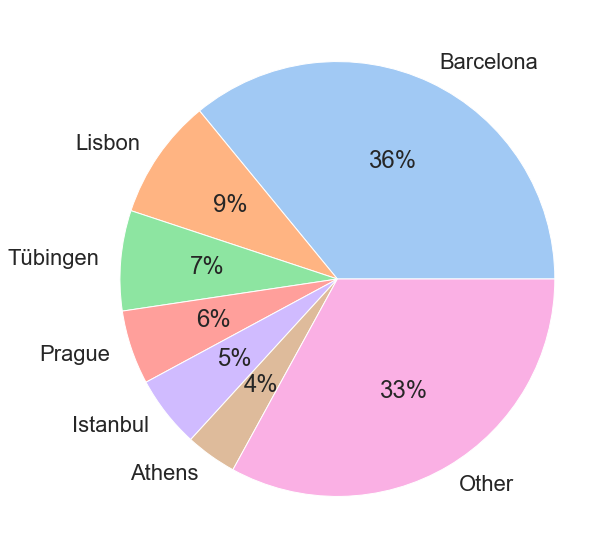

In [180]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.
sns.set(font_scale=2)
colors = sns.color_palette('pastel')[0:113]

plt.subplots(figsize = (10, 10))

#create pie chart
plt.pie(trunc_cities.values, labels = trunc_cities.keys(), colors = colors, autopct='%.0f%%')
plt.show()